<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Maximizing_Sales_in_Carrefour_using_Unsupervised_Learning/blob/master/Week_14_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining our question
> The marketing department of Carrefour Kenya is interested in knowing the most relevant marketing strategies that will result in the highest no. of sales. As data Scientists at Carrefour, we have been tasked to assist in giving solutions to the marketing depertment using the data available.


### a) Specifying the Question

> Apply unsupervised learning to assist the marketing department to increase number of sales.
> Apply dimensionality reduction in the same process.


### b) Defining the Metric for Success

* Effectively cleaning our dataset.
* Performing extensive exploratory data analysis where applicable.
* Applying Dimensionality Reduction.
* Selecting our features.
* Applying Association rules.
* Detecting anomalies in our data.


### c) Understanding the context

> Carrefour opened its first outlet in Kenya in 2016, and currently operates over 250 hypermarkets, supermarkets, and online stores in 15 countries across the region, with plans to extend into 38 countries in the Middle East, Central Asia, Africa and Russia. Carrefour currently operates 7 branches in Kenya and in order to be able to expand throughout Kenya, it's essential for it to maximize their sales and in turn their profit to ensure expansion.

### d) Recording the Experimental Design

1) Business Understanding: Understanding the business problem.

2) Reading the data: Getting access to our data and loading it using R.

3) Checking our data: Understanding our variables and the data types of our data.

4) Data cleaning: Checking for any missing values, duplicates, outliers and solving them.

5) EDA: Visualizing our data using univariate, bivariate and multivariate analysis.

6) Implementing the solution: Our business problem will be solved in four parts ;
  * Part 1: Dimensionality Reduction

 
  * Part 2: Feature Selection


  * Part 3: Association Rules


  * Part 4: Anomaly Detection

7) Conclusion: Give specific recommendataions that will boost sales for the marketing department at Carrefour Kenya.



# Part 1: Dimensionality Reduction

## Loading our dataset

In [2]:
# Reading the top of the sales data
sales <- read.csv("/content/Supermarket_Dataset_1 - Sales Data (2).csv")
head(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [4]:
# Read the bottom of our dataset
tail(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [5]:
# To take a look at the numeric and non numeric characters in our dataset.
str(sales)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

> Our data has 1000 entries and 16 variables.

> Our data has eight factor variables and 8 numerical variables.

In [6]:
# Checking for missing values in our dataset.
# Columns with missing values
colSums(is.na(sales))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [7]:
# Sum of missing
sum(is.na(sales))

[1] 0

> There are no missing values in our data.

In [8]:
# To show any duplicated rows
duplicated_rows <- sales[duplicated(sales),]
duplicated_rows

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


> There are no duplicated rows.

### EDA

In [3]:
# Loading prerequisites 
install.packages("ggplot2",dependencies=TRUE)
install.packages("ggpubr",dependencies=TRUE)
# libraries
library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘zoo’, ‘matrixStats’, ‘RcppArmadillo’, ‘e1071’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘sp’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘classInt’, ‘units’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘shiny’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘profvis’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘vdiffr’


Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘rgeos’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘sf’ had non-z

In [4]:
# Viewing the statistical summary of our dataset
summary(sales)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

In [5]:
# Get Variance of the multiple columns
library(dplyr)
sales %>% summarise_if(is.numeric, var)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
701.9653,8.546446,137.0966,54838.64,0,137.0966,2.953518,60459.6


In [6]:
# Get the standard deviation of multiple columns
library(dplyr)
sales %>% summarise_if(is.numeric, sd)

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.49463,2.923431,11.70883,234.1765,0,11.70883,1.71858,245.8853


## PCA

In [9]:
# Selecting the numerical data (excluding the categorical variables vs and am)
# 
df <- sales[,c(6,7,8,12,13,14,15,16)]
head(df)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


In [21]:
# Ensuring our variances is not 0
ndf <- df[ , which(apply(df, 2, var) != 0)]
head(ndf)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [22]:
# Previewing our PCAs
ndf.pca <- prcomp(ndf, center = TRUE, scale. = TRUE)
summary(ndf.pca)

Importance of components:
                          PC1    PC2    PC3     PC4       PC5       PC6
Standard deviation     2.2185 1.0002 0.9939 0.30001 3.132e-16 1.457e-16
Proportion of Variance 0.7031 0.1429 0.1411 0.01286 0.000e+00 0.000e+00
Cumulative Proportion  0.7031 0.8460 0.9871 1.00000 1.000e+00 1.000e+00
                             PC7
Standard deviation     3.219e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

> The first PCA accounts for 70% of the total variance while the second PCA accounts for 14% of the variance.

In [23]:
# Calling str() to have a look at your PCA object
# 
str(ndf.pca)

List of 5
 $ sdev    : num [1:7] 2.22 1.00 9.94e-01 3.00e-01 3.13e-16 ...
 $ rotation: num [1:7, 1:7] -0.292 -0.325 -0.45 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:7] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:7] -2.005 2.306 -0.186 -1.504 -2.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


> There are 7 PCAs identified

In [24]:
# We will now plot our pca. 
# ---
# 
install.packages("devtools",dependencies=TRUE)
# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘brio’, ‘clisymbols’, ‘gargle’, ‘cyclocomp’, ‘xmlparsedata’, ‘downlit’, ‘ragg’, ‘parsedate’, ‘rappdirs’, ‘whoami’, ‘hunspell’, ‘usethis’, ‘covr’, ‘BiocManager’, ‘curl’, ‘foghorn’, ‘gmailr’, ‘lintr’, ‘mockery’, ‘pingr’, ‘pkgdown’, ‘rhub’, ‘spelling’


Loading required package: usethis




farver    (2.0.1 -> 2.0.3 ) [CRAN]
backports (1.1.9 -> 1.1.10) [CRAN]
rprojroot (1.2   -> 1.3-2 ) [CRAN]
plyr      (NA    -> 1.8.6 ) [CRAN]


Installing 4 packages: farver, backports, rprojroot, plyr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpc6gun6/remotes6745f8f8b2/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:ggpubr’:

    mutate


Loading required package: scales

Loading required package: grid



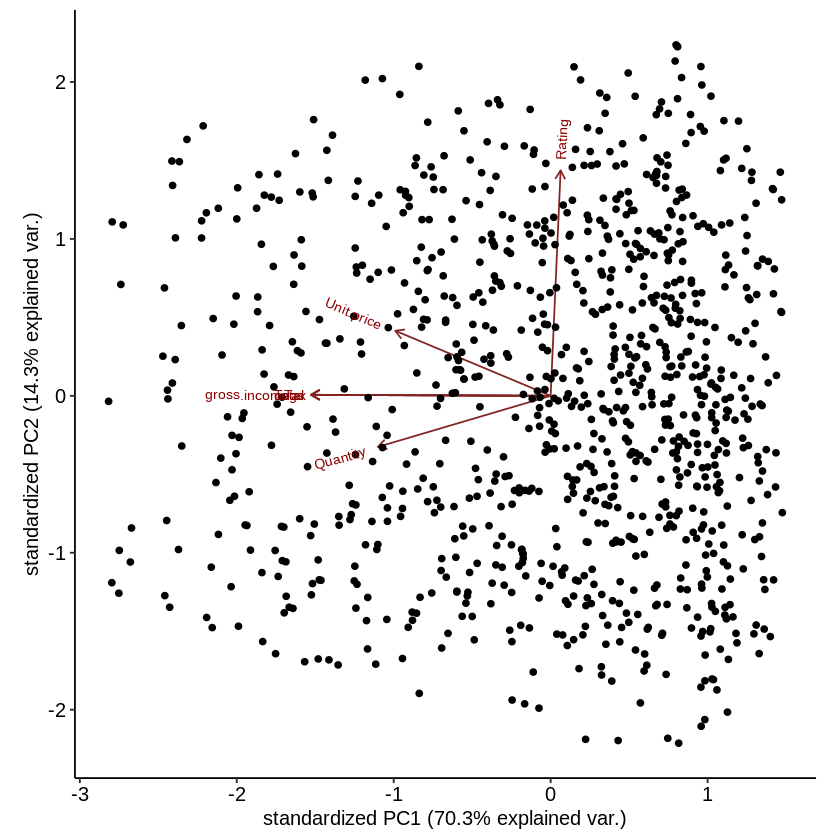

In [25]:
# Then Loading our ggbiplot library
#  
library(ggbiplot)
ggbiplot(ndf.pca)

> Most of our datapoints are those with high ratings and high quantity since those are those represented in PCA 1

# Part 2: Feature Selection


---

> By removing highly correlated variables.

In [31]:
#create a dataframe with all numeric and integer values 
new_sales <- sales[sapply(sales,is.numeric)]
head(new_sales)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


In [32]:
# Installing and loading our caret package
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [33]:
# Installing and loading the corrplot package for plotting
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)


In [35]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(new_sales)

# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
# ---
# 
highlyCorrelated

names(new_sales[,highlyCorrelated])

Warning message in cor(new_sales):
“the standard deviation is zero”


[1] 4 8 3

[1] "cogs"  "Total" "Tax"

> As shown above, the highly correlated variables are cogs, total and tax.

Warning message in cor(sales2):
“the standard deviation is zero”


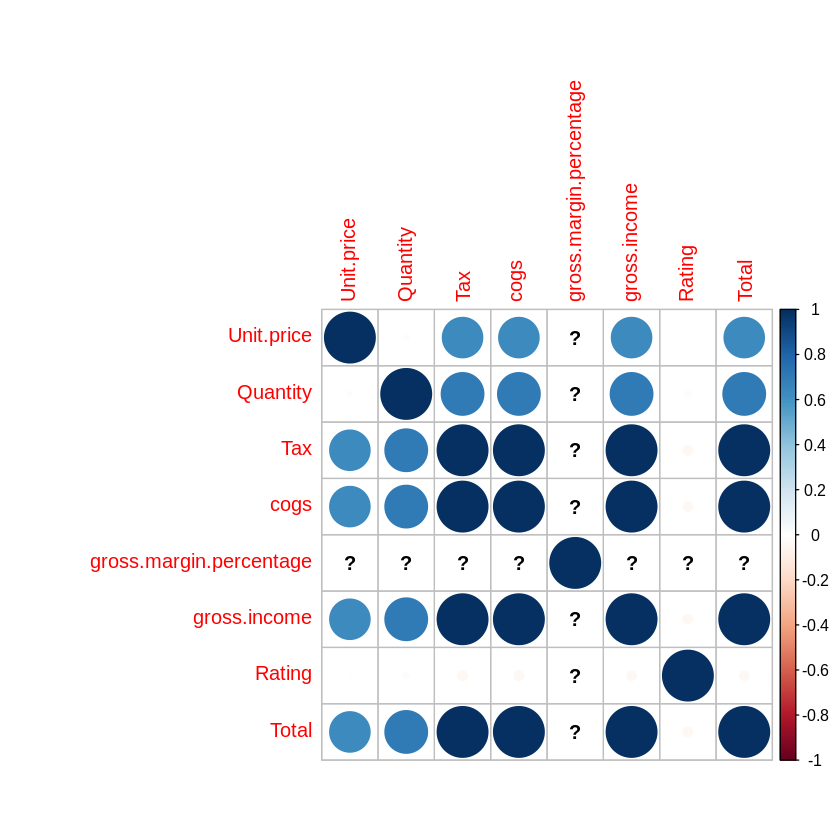

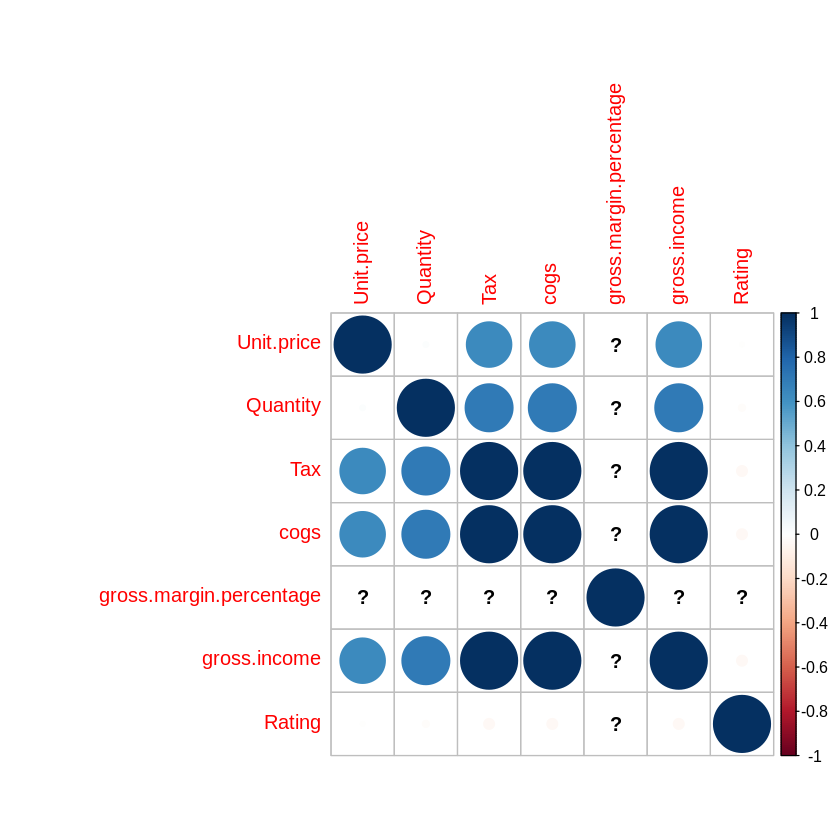

In [51]:
# Removing the highly correlated columns in our dataset
#sales2<-new_sales[-highlyCorrelated]
sales2<-new_sales[,c(1,2,3,4,5,6,7)]
# Performing our graphical comparison
# ---
# 
#par(mfrow = c(1, 2))
corrplot(correlationMatrix)
corrplot(cor(sales2))

In [39]:
sum(is.na(sales2))

[1] 0

# Part 3: Association Rules

In [58]:
# Reading the top of the data
sls <- read.csv("/content/Supermarket_Sales_Dataset II (1).csv")
head(sls)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,NA
2,chutney,,,,,,,,,,,,,,,,,,,NA
3,turkey,avocado,,,,,,,,,,,,,,,,,,NA
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,NA
5,low fat yogurt,,,,,,,,,,,,,,,,,,,NA
6,whole wheat pasta,french fries,,,,,,,,,,,,,,,,,,NA


In [59]:
# Tail of our dataset
tail(sls)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
7495,pancakes,light mayo,,,,,,,,,,,,,,,,,,NA
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,NA
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,NA
7498,chicken,,,,,,,,,,,,,,,,,,,NA
7499,escalope,green tea,,,,,,,,,,,,,,,,,,NA
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,,,,,,,,,,,,,,,,NA


In [60]:
# Confirming that our data is in a dataframe
class(sls)

[1] "data.frame"

In [61]:
# Taking a look at the summary of our data
summary(sls)

               shrimp              almonds              avocado    
 mineral water    : 577                :1754                :3112  
 burgers          : 576   mineral water: 484   mineral water: 375  
 turkey           : 458   spaghetti    : 411   spaghetti    : 279  
 chocolate        : 391   eggs         : 302   eggs         : 225  
 frozen vegetables: 373   ground beef  : 291   milk         : 213  
 spaghetti        : 354   french fries : 243   french fries : 180  
 (Other)          :4771   (Other)      :4015   (Other)      :3116  
       vegetables.mix       green.grapes      whole.weat.flour
              :4156               :4972               :5637   
 mineral water: 201   green tea   : 153   french fries: 107   
 eggs         : 181   eggs        : 134   eggs        : 102   
 french fries : 174   french fries: 130   green tea   : 100   
 spaghetti    : 167   chocolate   : 115   chocolate   :  71   
 milk         : 149   milk        : 114   pancakes    :  69   
 (Other)      :

In [63]:
install.packages("rmarkdown",repos = "http://cran.us.r-project.org")
install.packages("arules",repos = "http://cran.us.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
install.packages("arulesViz",repos = "http://cran.us.r-project.org")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’




In [66]:
# Loading our libraries
library(arules)
library(arulesViz)

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



In [84]:
# Building a model based on association rules 
# using the apriori function
rules <- apriori(sls,parameter=list(support=0.95, confidence = 0.9,minlen=6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.95      6
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1280 item(s), 7500 transaction(s)] done [0.04s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.00s].
writing ... [837 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


>The rules recorded above are 837. We will want the least number of rules in order to just have the most relevant

In [82]:
# Getting statistical information such as support, lift and confidence.
# 
summary(rules)

set of 837 rules

rule length distribution (lhs + rhs):sizes
  6   7   8   9 
504 252  72   9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.000   6.000   6.000   6.505   7.000   9.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.9660   Min.   :0.9691   Min.   :0.9660   Min.   :1.000  
 1st Qu.:0.9660   1st Qu.:1.0000   1st Qu.:0.9660   1st Qu.:1.000  
 Median :0.9660   Median :1.0000   Median :0.9660   Median :1.003  
 Mean   :0.9703   Mean   :0.9977   Mean   :0.9726   Mean   :1.006  
 3rd Qu.:0.9796   3rd Qu.:1.0000   3rd Qu.:0.9796   3rd Qu.:1.012  
 Max.   :0.9939   Max.   :1.0000   Max.   :0.9968   Max.   :1.021  
     count     
 Min.   :7245  
 1st Qu.:7245  
 Median :7245  
 Mean   :7277  
 3rd Qu.:7347  
 Max.   :7454  

mining info:
 data ntransactions support confidence
  sls          7500    0.95        0.5

> * Our support is high enough (0.95)
* our lifts are higher than 1 
* However our confinence is not that close to 1.

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



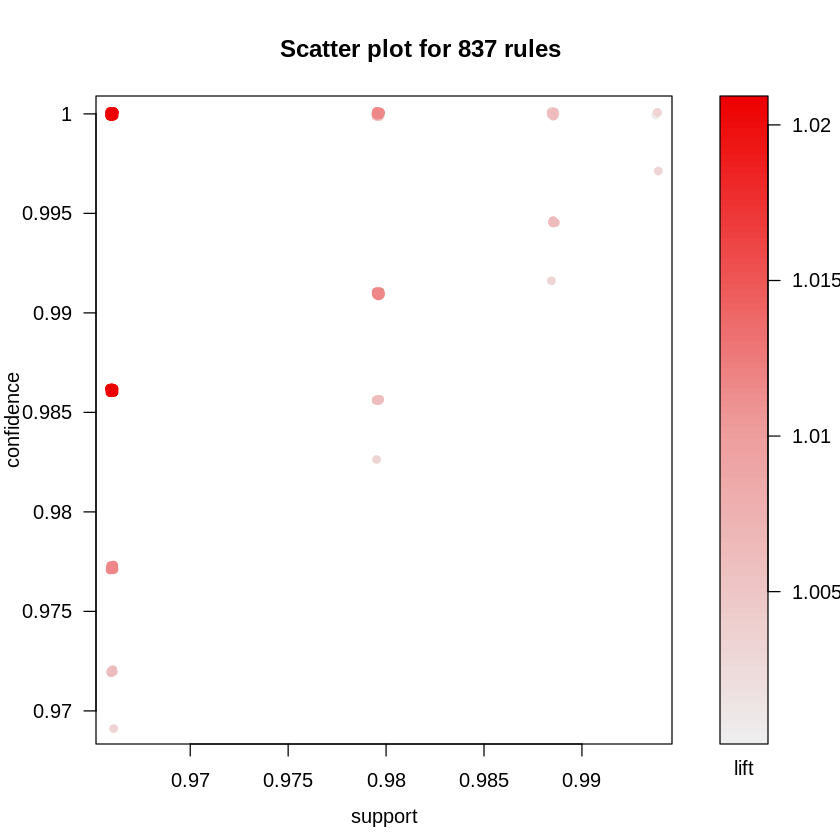

In [88]:
# Taking a look of our rules 
# Visualizing the lift, support and confidence
plot(rules,method = "scatterplot")

> All our rules have a healthy confidence, lift as well as support.

Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


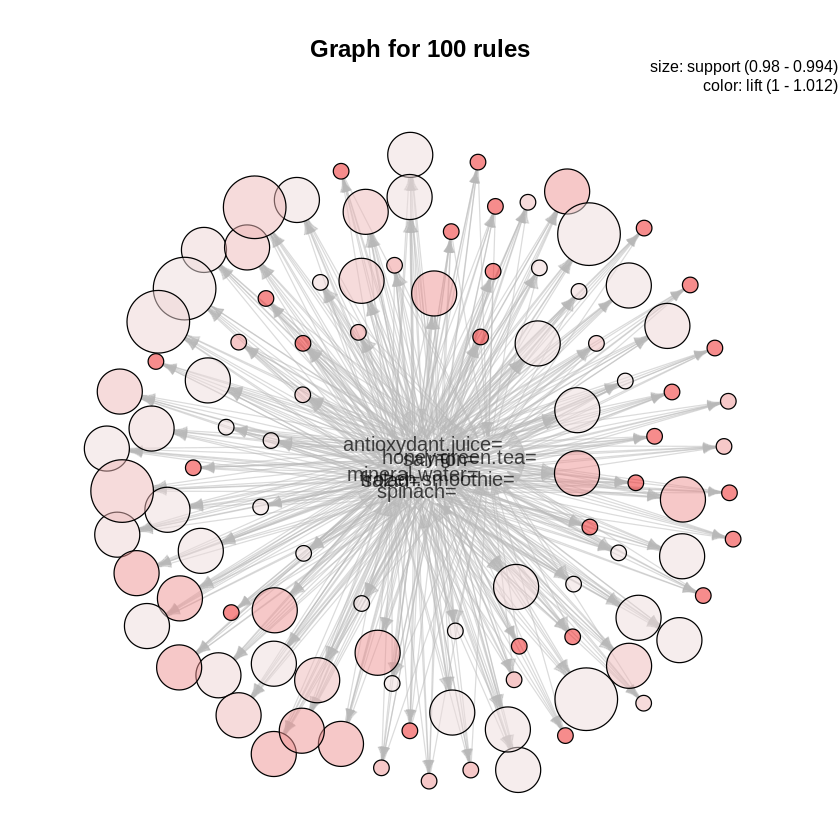

In [89]:
# Visualizing the top 100 rules
plot(rules,method = "graph")

In [85]:
# Observing rules built in our first 5 model rules
# 
inspect(rules[1:5])

    lhs                  rhs              support confidence coverage     lift count
[1] {low.fat.yogurt=,                                                               
     green.tea=,                                                                    
     honey=,                                                                        
     salad=,                                                                        
     mineral.water=}  => {salmon=}          0.966          1    0.966 1.000934  7245
[2] {low.fat.yogurt=,                                                               
     green.tea=,                                                                    
     honey=,                                                                        
     salad=,                                                                        
     salmon=}         => {mineral.water=}   0.966          1    0.966 1.003210  7245
[3] {low.fat.yogurt=,                                            

> * The ones shown above are our first 5 rules.

In [86]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                  rhs              support confidence coverage     lift count
[1] {low.fat.yogurt=,                                                               
     green.tea=,                                                                    
     honey=,                                                                        
     salad=,                                                                        
     mineral.water=}  => {salmon=}          0.966          1    0.966 1.000934  7245
[2] {low.fat.yogurt=,                                                               
     green.tea=,                                                                    
     honey=,                                                                        
     salad=,                                                                        
     salmon=}         => {mineral.water=}   0.966          1    0.966 1.003210  7245
[3] {low.fat.yogurt=,                                            

> The above rules have very strong confidences and therefore we will mostly apply them.
* The first rule says that people who buy low.fat.yogurt, green tea, honey and salad also buy salmon .

> * The second rule says people who buy low.fat.yogurt, green tea, honey and salad also buy mineral water.

In [87]:
# Given that carrefour intends to promote mineral water, 
# the products that will increase the sales of mineral water will be shown by the rules bellow
mineral.water <- subset(rules, subset = rhs %pin% "mineral.water")
# Then order by confidence
mineral.water<-sort(mineral.water, by="confidence", decreasing=TRUE)
inspect(mineral.water[1:5])

    lhs                     rhs              support confidence coverage    lift count
[1] {low.fat.yogurt=,                                                                 
     green.tea=,                                                                      
     honey=,                                                                          
     salad=,                                                                          
     salmon=}            => {mineral.water=}   0.966          1    0.966 1.00321  7245
[2] {low.fat.yogurt=,                                                                 
     green.tea=,                                                                      
     honey=,                                                                          
     salad=,                                                                          
     antioxydant.juice=} => {mineral.water=}   0.966          1    0.966 1.00321  7245
[3] {low.fat.yogurt=,                      

> Products that are often sold together with mineral water are low fat yogurt, green tea, honey, salad, salmon, antioxydant juice, spinach and frozen smoothie.

# Part 4: Anomaly Detection


---
Checking for any anomalies for a period of time (time series) in the sales of Carrefour.


## Tidy Anomaly Detection

In [119]:
# Reading the top of the  data
sf <- read.csv("/content/Supermarket_Sales_Forecasting - Sales (1).csv")
head(sf)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [92]:
# Looking at the tail of our dataset
tail(sf)

,Date,Sales
,<fct>,<dbl>
995,2/18/2019,63.9975
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


In [ ]:
# Installing anomalize package
#
install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘hexbin’, ‘data.table’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [93]:
#install.packages('devtools') 
devtools::install_github("business-science/anomalize")

TTR        (NA    -> 0.24.2 ) [CRAN]
listenv    (NA    -> 0.8.0  ) [CRAN]
quantmod   (NA    -> 0.4.17 ) [CRAN]
quadprog   (NA    -> 1.5-8  ) [CRAN]
openssl    (1.4.2 -> 1.4.3  ) [CRAN]
globals    (NA    -> 0.13.0 ) [CRAN]
future     (NA    -> 1.18.0 ) [CRAN]
warp       (NA    -> 0.1.0  ) [CRAN]
furrr      (NA    -> 0.1.0  ) [CRAN]
urca       (NA    -> 1.3-0  ) [CRAN]
tseries    (NA    -> 0.10-47) [CRAN]
fracdiff   (NA    -> 1.5-1  ) [CRAN]
forecast   (NA    -> 8.13   ) [CRAN]
anytime    (NA    -> 0.3.9  ) [CRAN]
slider     (NA    -> 0.1.5  ) [CRAN]
xts        (NA    -> 0.12.1 ) [CRAN]
padr       (NA    -> 0.5.3  ) [CRAN]
rsample    (NA    -> 0.0.7  ) [CRAN]
timetk     (NA    -> 2.2.1  ) [CRAN]
tibbletime (NA    -> 0.1.6  ) [CRAN]
sweep      (NA    -> 0.2.3  ) [CRAN]


Installing 21 packages: TTR, listenv, quantmod, quadprog, openssl, globals, future, warp, furrr, urca, tseries, fracdiff, forecast, anytime, slider, xts, padr, rsample, timetk, tibbletime, sweep

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpc6gun6/remotes6764012e19/business-science-anomalize-a615e6a/DESCRIPTION’ (357ms)
─  preparing ‘anomalize’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘anomalize_0.2.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [99]:
library(anomalize) #tidy anomaly detectiom
library(tidyverse) #tidyverse packages like dplyr, ggplot, tidyr

In [132]:
#seperate the year,month and day
x=sf %>%
  dplyr::mutate(year = lubridate::year(Date), 
                month = lubridate::month(Date), 
                day = lubridate::day(Date))
head(x)

,Date,Sales,year,month,day
,<date>,<dbl>,<dbl>,<dbl>,<int>
1,2020-01-05,548.9715,2020,1,5
2,2020-03-08,80.2200,2020,3,8
3,2020-03-03,340.5255,2020,3,3
4,2020-01-27,489.0480,2020,1,27
5,2020-02-08,634.3785,2020,2,8
6,2020-03-25,627.6165,2020,3,25


> All our data is for the year 2020

In [133]:
# Selecting month and sales
# 
ss <- x[,c(2,4)]
head(ss)

,Sales,month
,<dbl>,<dbl>
1,548.9715,1
2,80.2200,3
3,340.5255,3
4,489.0480,1
5,634.3785,2
6,627.6165,3


In [141]:
ss %>%
    time_decompose(count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(ncol = 2, alpha_dots = 0.5)

ERROR: ignored

In [136]:
#data(ss)
res = AnomalyDetectionTs(ss)
res$plot

ERROR: ignored

* Tidy Anomaly Detection, is giving us a bit of an error so we will look for another way to detect anomalies

## Cook’s Distance / Cook’s D


---
* Cook’s distance, Di, is used in Regression Analysis to find influential outliers in a set of predictor variables. 

https://www.statisticshowto.com/cooks-distance/


In [142]:
# Generating our regression
mod <- lm(Sales ~ ., data=sf)
cooksd <- cooks.distance(mod)

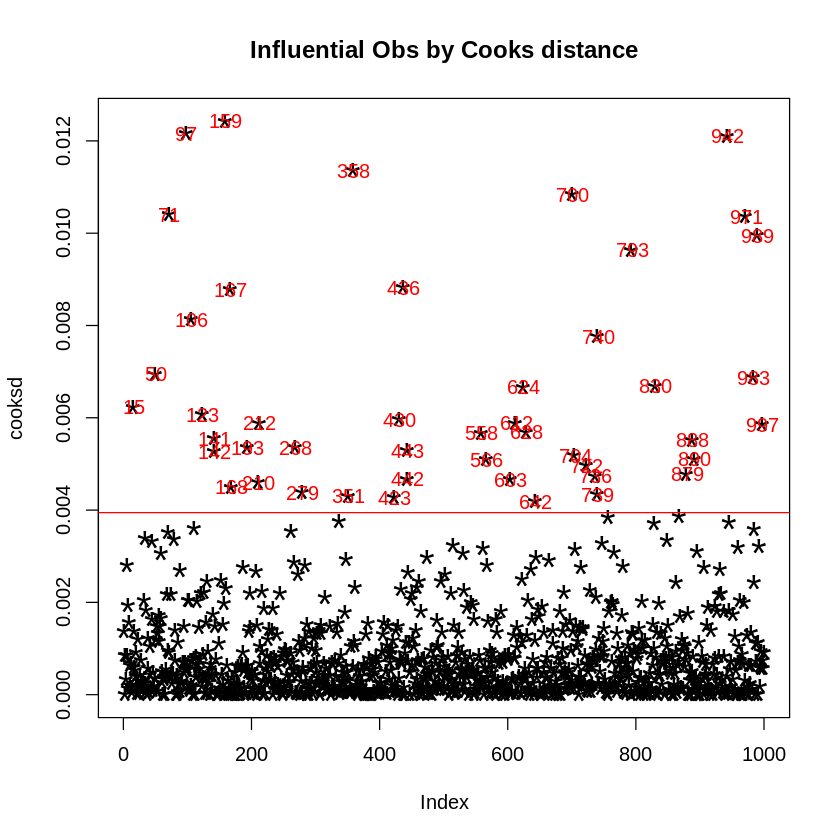

In [143]:
# Calculating our cooks distance and visualizing it
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

In [144]:
# Observing the rows with anomalies
influential <- as.numeric(names(cooksd)[(cooksd > 4*mean(cooksd, na.rm=T))])  # influential row numbers
head(sf[influential, ])

,Date,Sales
,<date>,<dbl>
15,2020-03-29,749.490
50,2020-03-19,867.615
71,2020-01-06,939.540
97,2020-03-29,922.635
106,2020-01-12,931.035
123,2020-03-09,944.622


> As shown above, the 123 row, date 2020-03-09 has a very high recording of sales.It should be therefore identified what factors influenced the sales on that day, if they were legitimate, the same strategies should be emulated.
> The rows above shows the exact dates when the anomalies occured.

# Conclusions and Recommendations


---
* Products that are mostly sold together with mineral water should be highly promoted to increase the number of sales of mineral water.

* Carrefour had very high sales on the dates, 2020-03-29, 2020-03-19, 2020-01-06, 2020-03-29, 2020-01-12 and 2020-03-09 therefore strategies used on those days should be used to increase sales.

* Cogs,total and tax are highly correlated variables.

* From our PCA, products with higher ratings also tend to have high sales therefore the marketing depertment should consider increasing the inventory of products with a high rating.



# Follow up Questions




---

#### Did we have the correct data? 

> Yes we did and it was able to advise on strategies to increase sales. 


